Objetivo: Analisar os dados do E-commerce e responder algumas pergntas de negócio.

1-Qual região vende mais ?
2-Qual a forma de pagamento mais utilizada pelos clientes ?
3-Qual o departamento que obteve o mais faturamento?
4-Qual categoria de pagamento obteve o maior número de vendas no trimestre ?
5-Qual a proporção de usuários utilizam o Cashback em suas compras ?
6-Analisar as notas dadas pelos clientes durante as compras e verificar qual a nota que os clientes mais atribuíram ?
7-Verificar o gênero e a idade que mais realizam compras ?
8-Verificar se existe outliers na diferença de idade entre os gêneros ?
9-Agrupar as vendas por estado e região?

In [3]:
#Importando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#pip install plotly

In [4]:
#URLs paa referência
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"

In [7]:
clientes = pd.read_csv(url_clientes)

In [8]:
clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [5]:
vendas = pd.read_csv(url_vendas)

In [6]:
vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


In [9]:
#Obtendo informações do dataframe clientes
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_compra         6169 non-null   int64 
 1   ID_cliente        6169 non-null   int64 
 2   cidade            6169 non-null   object
 3   uf                6169 non-null   object
 4   regiao            6169 non-null   object
 5   idade             6169 non-null   int64 
 6   sexo_biologico    6169 non-null   object
 7   cashback          6169 non-null   object
 8   avaliacao_compra  6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [11]:
clientes.describe() #Análise estatistica

,ID_compra,ID_cliente,idade,avaliacao_compra
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [12]:
vendas.describe()

,ID_compra,preco_unitario,quantidade,frete
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,873.234738,3.004863,119.233832
std,1780.981237,1852.064342,1.420725,366.149225
min,1.000000,2.900000,1.000000,0.000000
25%,1543.000000,44.900000,2.000000,0.320000
50%,3085.000000,93.900000,3.000000,7.550000
75%,4627.000000,221.900000,4.000000,29.240000
max,6169.000000,8000.000000,5.000000,4521.540000


In [13]:
#Contagem dos clientes por sexo
clientes['sexo_biologico'].value_counts() #Value counts realiza a contagem dos elementos de uma coluna do dataframe

Feminino     3371
Masculino    2798
Name: sexo_biologico, dtype: int64

In [15]:
#Calculando a média de idade dos clientes
clientes['idade'].mean()

38.2600097260496

In [16]:
#Clientes por região
clientes['regiao'].value_counts()

Sudeste         2666
Nordeste        1882
Sul              819
Centro-Oeste     495
Norte            307
Name: regiao, dtype: int64

In [17]:
#Calculo da media das notas dos clientes
clientes['avaliacao_compra'].mean()

8.44366996271681

In [18]:
#Calculo da media das notas dos clientes
clientes['avaliacao_compra'].median()

9.0

In [19]:
#realizando a contagem de clientes que utilizam cashback em suas compras
clientes['cashback'].value_counts()

Não    3557
Sim    2612
Name: cashback, dtype: int64

In [25]:
#Obtendo informações do dataframe vendas
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_compra         6169 non-null   int64         
 1   data              6169 non-null   datetime64[ns]
 2   horario           6169 non-null   object        
 3   categoria         6169 non-null   object        
 4   preco_unitario    6169 non-null   float64       
 5   quantidade        6169 non-null   int64         
 6   frete             6169 non-null   float64       
 7   metodo_pagamento  6169 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 385.7+ KB


In [24]:
# Transformando a data do objeto pra datatime64
vendas["data"] = pd.to_datetime(vendas["data"],format="%Y-%m-%d")

In [26]:
#Estatistica descritivas para variaveis númericas
vendas.describe()

,ID_compra,preco_unitario,quantidade,frete
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,873.234738,3.004863,119.233832
std,1780.981237,1852.064342,1.420725,366.149225
min,1.000000,2.900000,1.000000,0.000000
25%,1543.000000,44.900000,2.000000,0.320000
50%,3085.000000,93.900000,3.000000,7.550000
75%,4627.000000,221.900000,4.000000,29.240000
max,6169.000000,8000.000000,5.000000,4521.540000


In [27]:
#Contagem de vendas por categoria de produto
vendas['categoria'].value_counts()

Alimentos e bebidas           1495
Beleza e cuidados pessoais    1062
Casa e limpeza                1041
Eletrodomésticos               665
Eletrônicos                    580
Papelaria e escritório         551
Ferramentas e construção       474
Livros                         301
Name: categoria, dtype: int64

In [28]:
# preço médio unitario dos produtos
vendas['preco_unitario'].mean()

873.2347382071648

In [29]:
# Quantidade total de produtos vendidos
vendas['quantidade'].sum()

18537

In [33]:
# valor total do frete arrecadado
print("Valor total do frete", vendas['frete'].sum())
print("Valor do frete médio", vendas['frete'].mean())


Valor total do frete 735553.51
Valor do frete médio 119.23383206354353


In [31]:
# Métodos de pagamento utilizados e sua frequencia
vendas['metodo_pagamento'].value_counts()

Cartão de Crédito    2851
PIX                  2244
Cartão de Débito      547
Boleto                527
Name: metodo_pagamento, dtype: int64

In [32]:
# Unindo as duas base de dados "Clientes" e "Vendas"
#como as duas base de dados obtem a coluna "ID compra", faremos essa junção por meio dessa coluna
df = pd.merge(vendas, clientes, on="ID_compra")

In [37]:
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


In [35]:
#Organizando as colunas na sequencia desejada
colunas_organizadas = [
    "ID_compra","data","horario","categoria","preco_unitario",
    "quantidade","frete","metodo_pagamento","ID_cliente","idade",
    "sexo_biologico","cidade","uf","regiao","cashback","avaliacao_compra"
]
df = df[colunas_organizadas]

In [36]:
#Verfificando o dataframe
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


Tabela 'metodos_de_pagamento':
  Metodo de Pagamento  Quantidade
0   Cartão de Crédito        2851
1                 PIX        2244
2    Cartão de Débito         547
3              Boleto         527


<function matplotlib.pyplot.show(close=None, block=None)>

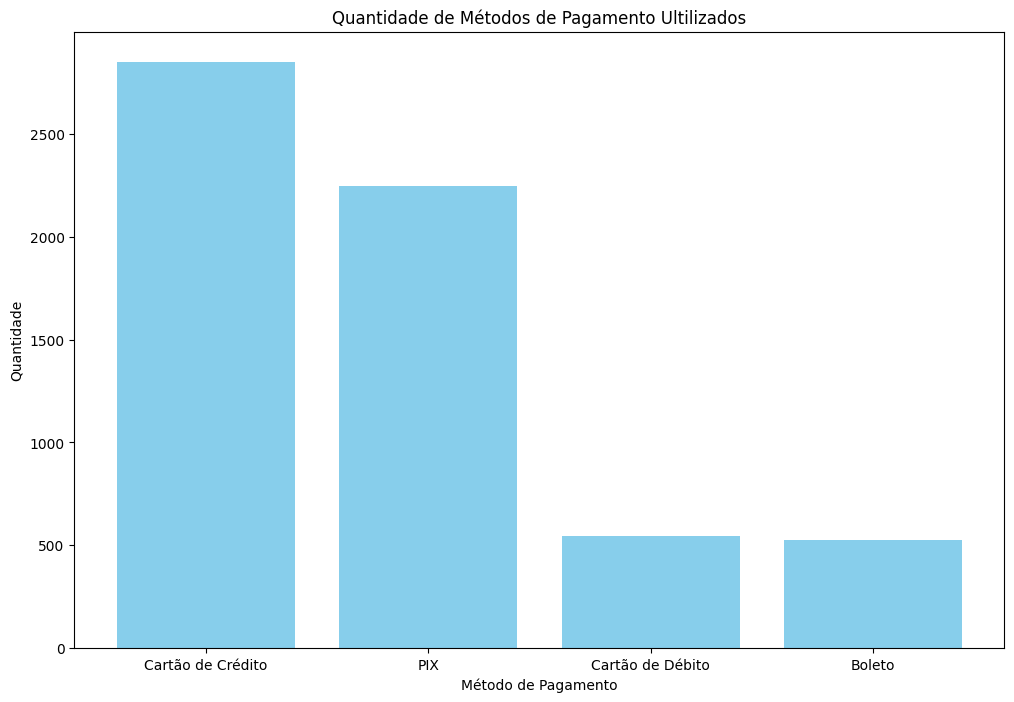

In [40]:
#Criar a tabela "metodo_de_pagamento"
metodos_de_pagamento = df['metodo_pagamento'].value_counts().reset_index()
metodos_de_pagamento.columns=['Metodo de Pagamento','Quantidade']

#Visualização
plt.figure(figsize=(12,8))
plt.bar(metodos_de_pagamento['Metodo de Pagamento'],metodos_de_pagamento['Quantidade'],color='skyblue')
plt.title('Quantidade de Métodos de Pagamento Ultilizados')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=0,ha='center')

#exibir a tabela
print("Tabela 'metodos_de_pagamento':")
print(metodos_de_pagamento)

#Exibir o gráfico
plt.show

In [ ]:
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

In [44]:
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra,faturamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10,18544.86
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8,115.90
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7,151.58
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9,444.95
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9,660.00


In [47]:
# agrupando faturamento por categoria
faturamento_categoria = df.groupby('categoria')['faturamento'].sum().reset_index()


In [48]:
faturamento_categoria

,categoria,faturamento
0,Alimentos e bebidas,241663.20
1,Beleza e cuidados pessoais,441649.72
2,Casa e limpeza,331036.13
3,Eletrodomésticos,4548591.79
4,Eletrônicos,11025894.73
5,Ferramentas e construção,264552.08
6,Livros,78380.24
7,Papelaria e escritório,47239.62


In [49]:
# Organizando o faturamento por categoria
faturamento_categoria = faturamento_categoria.sort_values(by='faturamento',ascending=False)

Text(0.5, 1.0, 'Faturamento por categoria')

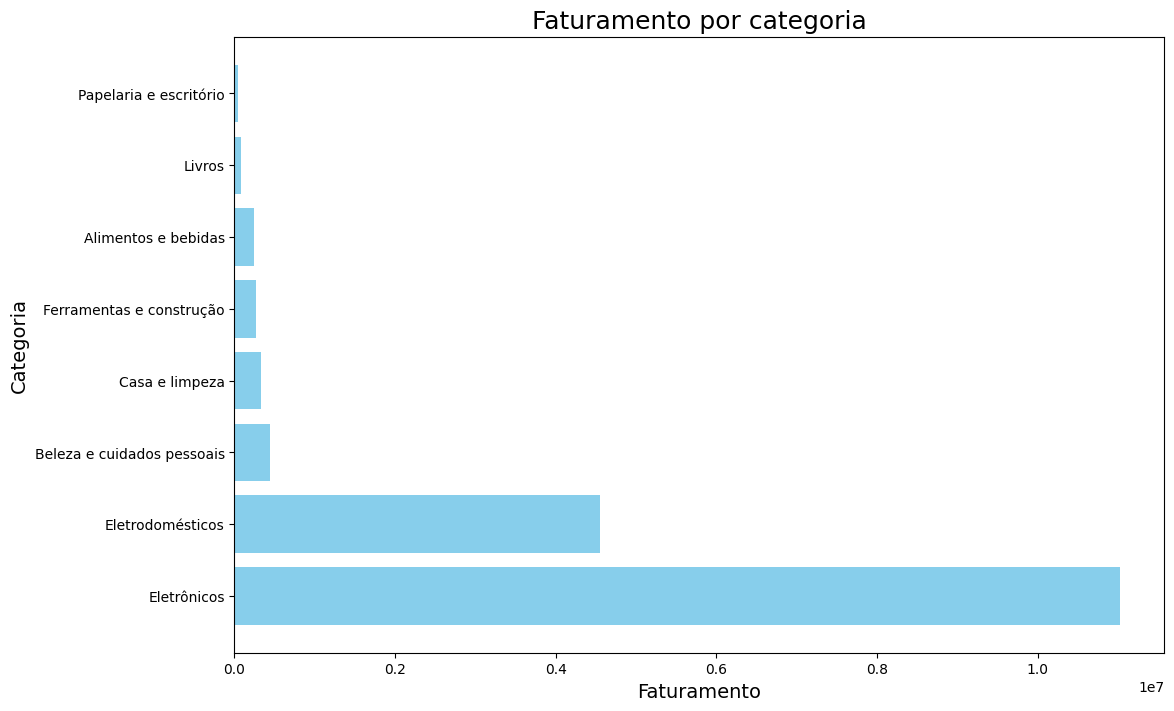

In [50]:
# Visualização
plt.figure(figsize=(12,8))
plt.barh(faturamento_categoria['categoria'],faturamento_categoria['faturamento'],color='skyblue')
plt.xlabel('Faturamento',fontsize=14)
plt.ylabel('Categoria',fontsize=14)
plt.title('Faturamento por categoria',fontsize=18)

C:\Users\dsadm\AppData\Local\Temp\ipykernel_12912\4008855579.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'] = df['data'].dt.strftime('%B')


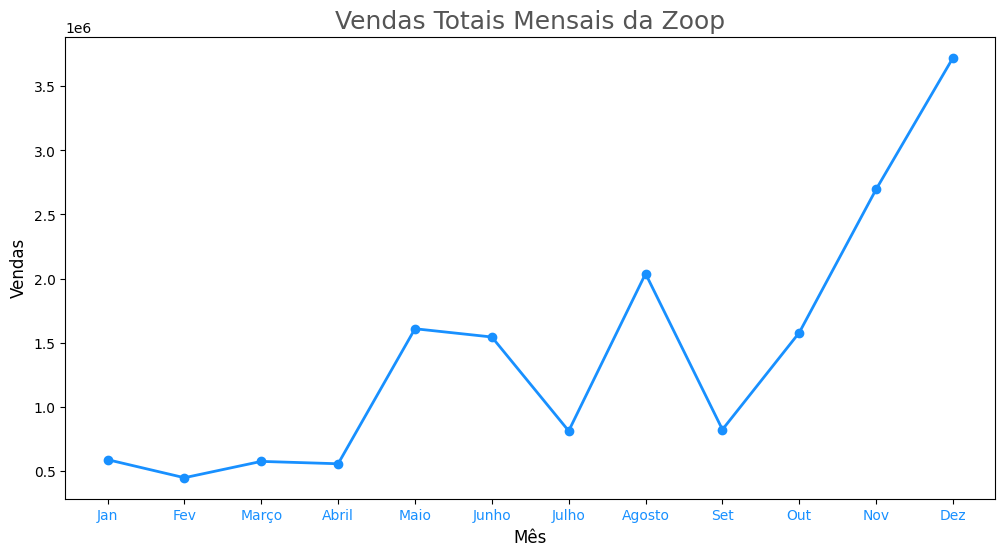

In [52]:
#Dicionario dos meses
meses = {
    'January':'Jan',
    'February':'Fev',
    'March':'Março',
    'April':'Abril',
    'May':'Maio',
    'June':'Junho',
    'July':'Julho',
    'August':'Agosto',
    'September':'Set',
    'October':'Out',
    'November':'Nov',
    'December':'Dez'
    }
#Agrupando por mes as vendas
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())
# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

# Adicionar rótulos e título
plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Vendas', fontsize=12)

# Alterar rótulos do eixo x utilizando o dicionário de tradução
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=10, color='#1890FF')

# Exibir o gráfico
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_12912\2091173274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trimestre'] = df['data'].dt.to_period('Q')


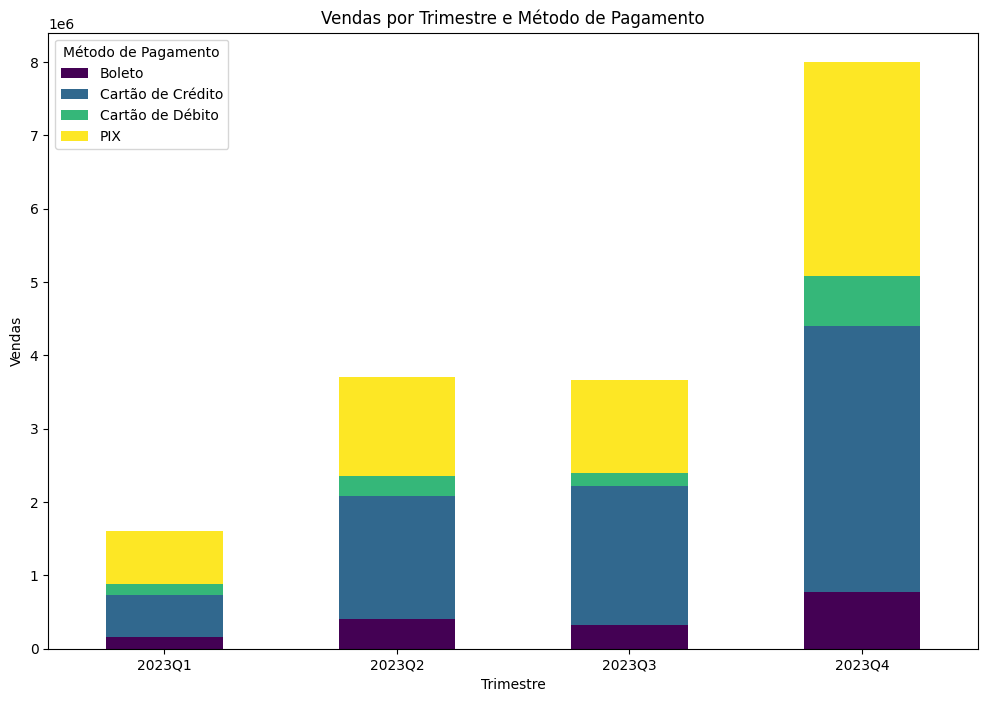

In [53]:
# Criar uma nova coluna para identificar o trimestre
df['trimestre'] = df['data'].dt.to_period('Q')

# Agrupar por trimestre e método de pagamento, somando o faturamento
vendas_por_trimestre = df.groupby(['trimestre', 'metodo_pagamento'])['faturamento'].sum().unstack()

# Visualização em gráfico de barras empilhadas
vendas_por_trimestre.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Vendas por Trimestre e Método de Pagamento')
plt.xlabel('Trimestre')
plt.ylabel('Vendas')
plt.legend(title='Método de Pagamento')
plt.xticks(rotation=0, ha='center')

plt.show()